In [1]:
print(ks)

<module 'keras' from 'C:\\anaconda3\\lib\\site-packages\\keras\\__init__.py'>


In [2]:
from pprint import pprint
import os, shutil

In [3]:
data = ks.datasets.imdb

In [4]:
max_features = 10000
max_len = 8
(x_train1, y_train), (x_test1,y_test) = ks.datasets.imdb.load_data(num_words = max_features)

In [5]:
print(x_train.shape)
print(x_train[0])
#print(type(x_train[0]))

NameError: name 'x_train' is not defined

In [ ]:
import keras.preprocessing as preproc
print(preproc)
x_train = preproc.sequence.pad_sequences(x_train1,maxlen = max_len)
x_test = preproc.sequence.pad_sequences(x_test1,maxlen = max_len)
print(x_train.shape)
print(x_train[0])
#print(x_test.shape)

In [ ]:
model = ks.models.Sequential()
model.add(ks.layers.Embedding(max_features, 8, input_length=max_len))
model.add(ks.layers.Flatten()) # This is just a reshape!
#model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

In [88]:
model.compile(   
    optimizer = ks.optimizers.RMSprop(lr=0.0001),
    loss= ks.losses.binary_crossentropy,
    metrics= ["accuracy"],
)

In [89]:
history = model.fit(
    x_train,y_train,
    epochs = 30,
    batch_size = 32,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 5s 273us/step - loss: 0.6931 - acc: 0.5020 - val_loss: 0.6923 - val_acc: 0.5230
Epoch 2/30
20000/20000 [==============================] - 4s 205us/step - loss: 0.6908 - acc: 0.5484 - val_loss: 0.6910 - val_acc: 0.5378
Epoch 3/30
20000/20000 [==============================] - 4s 205us/step - loss: 0.6880 - acc: 0.5920 - val_loss: 0.6890 - val_acc: 0.5624
Epoch 4/30
20000/20000 [==============================] - 4s 210us/step - loss: 0.6842 - acc: 0.6322 - val_loss: 0.6860 - val_acc: 0.5900
Epoch 5/30
20000/20000 [==============================] - 4s 183us/step - loss: 0.6790 - acc: 0.6653 - val_loss: 0.6817 - val_acc: 0.6166
Epoch 6/30
20000/20000 [==============================] - 4s 178us/step - loss: 0.6720 - acc: 0.6934 - val_loss: 0.6758 - val_acc: 0.6382
Epoch 7/30
20000/20000 [==============================] - 4s 181us/step - loss: 0.6632 - acc: 0.7077 - val_loss: 0.6682 - v

In [90]:
history_dict = history.__dict__
#pprint(history_dict)

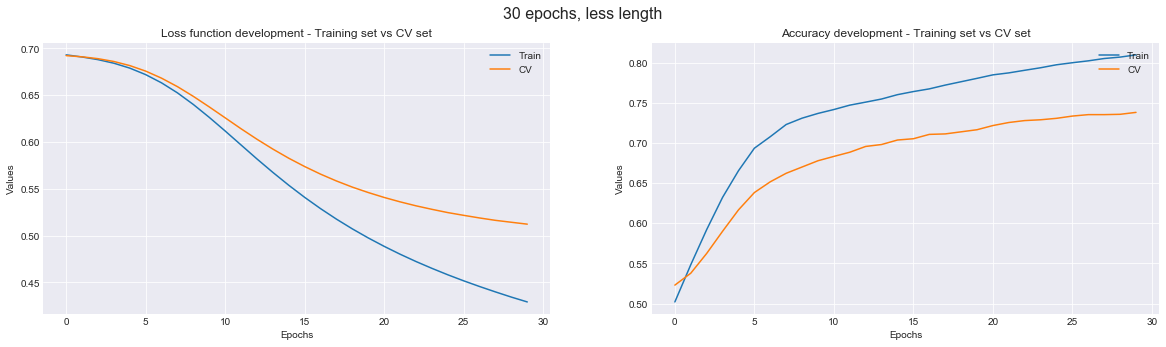

In [91]:
model_title = "30 epochs, length = 20"
def plot_hist(history_dict):
    fig = plt.figure(figsize=(5,4))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5),sharey=False)
    
    ax1.plot(history_dict['epoch'],  history_dict['history']['loss'],label="Train")
    ax1.plot(history_dict['epoch'],  history_dict['history']['val_loss'],label="CV")
    ax1.set_title("Loss function development - Training set vs CV set")
    ax1.legend(loc='upper right')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Values')
    
    ax2.plot(history_dict['epoch'],  history_dict['history']['acc'],label="Train")
    ax2.plot(history_dict['epoch'],  history_dict['history']['val_acc'],label="CV")
    ax2.set_title("Accuracy development - Training set vs CV set")
    ax2.legend(loc='upper right')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Values')
    
    plt.suptitle(model_title, fontsize=16)
    
    plt.show()

plot_hist(history_dict)